<font size = 8 color ='336EFF'>k Nearest Neighbors</font>

Import libraries

In [1]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 

## Define kNN using the steps from the pseudocode
The KNN Algorithm:
<ol>
    <li>Load the data</li>
    <li>Initialize K to your chosen number of neighbors</li>
    <li>For each example in the data</li>
    <ol>
    <li>Calculate the distance between the query example and the current example from the data.</li>
    <li>Add the distance and the index of the example to an ordered collection</li>
    </ol>
    <li>Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances</li>
    <li>Pick the first K entries from the sorted collection</li>
    <li>Get the labels of the selected K entries</li>
    <li>a) If regression, return the mean of the K labels</li>
    <li>b) If classification, return the mode of the K labels</li>
</ol>

In [1]:
def knn(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []
    # 3. For each example in the data
    neighbor_distances_and_indices = np.zeros((data.shape[0], 2))
    print(neighbor_distances_and_indices)
    for index, example in enumerate(data):
        print("index: ", index, "example: ", example)
        # 3.1 Calculate the distance between the query example and the current
        # example from the data.
        distance = distance_fn(example[:-1], query)
        print("distance: ", distance)
        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices[index, 0], neighbor_distances_and_indices[index, 1] = distance, index
        print(neighbor_distances_and_indices)
        # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices =  neighbor_distances_and_indices[neighbor_distances_and_indices[:,0].argsort(kind='mergesort')]
    print(sorted_neighbor_distances_and_indices)
    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k, :]
    # 6. Get the labels of the selected K entries
    k_nearest_labels = np.zeros((k, 1))
    n = 0
    for distance, i in k_nearest_distances_and_indices:
        i = int(i)
        k_nearest_labels[n, 0] = data[i, -1]
        n += 1

    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    return k_nearest_distances_and_indices , choice_fn(k_nearest_labels)

### Auxiliar functions

In [2]:
def mean(labels):
    return sum(labels) / len(labels)

def mode(labels):
    #find unique values in array along with their counts
    vals, counts = np.unique(labels, return_counts=True)
    #find mode
    mode_value = np.argwhere(counts == np.max(counts))
    return mode_value#stats.mode(labels)

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    dis = np.linalg.norm(point1 - point2)
    return dis

Ploting Functions

In [ ]:
def plot_reg(X, y, x_pred, y_pred):
    # plotting points with diff color for diff label
    plt.plot(X, y, 'o', c='b')

    plt.plot(x_pred, y_pred, '*', c='k', label='reg line')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def plot_class(X, y, x_pred, y_pred):
    # labelled observations
    x_0 = X[np.where(y == 0.0)]
    x_1 = X[np.where(y == 1.0)]
    # plotting points with diff color for diff label
    plt.scatter([x_0[:, 0]], [x_0[:, 1]], c='b', label='y = 0')
    plt.scatter([x_1[:, 0]], [x_1[:, 1]], c='r', label='y = 1')

    # plotting decision boundary
    if y_pred == 0:
        color = 'b'
    elif y_pred == 1:
        color = 'r'
    plt.plot(x_pred[0], x_pred[1], '*', c=color, label='reg line')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()


### Regression
#### Regression Data
#### Column 0: height (inches)
#### Column 1: weight (pounds)


[128.24666667]


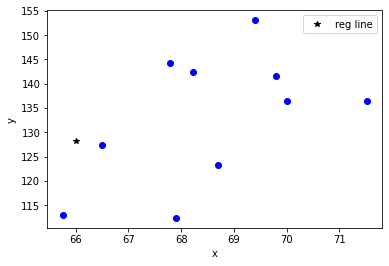

In [ ]:
reg_data = np.array([ [65.75, 112.99], [71.52, 136.49], [69.40, 153.03], [68.22, 142.34], [67.79, 144.30], [68.70, 123.30], [69.80, 141.49], [70.01, 136.46], [67.90, 112.37], [66.49, 127.45], ])

# Question:
# Given the data we have, what's the best-guess at someone's weight if they are 60 inches tall?
reg_query = [66]
reg_k_nearest_neighbors, reg_prediction = knn(
    reg_data, reg_query, k=3, distance_fn=euclidean_distance, choice_fn=mean)
print(reg_prediction)
plot_reg(reg_data[:, 0], reg_data[:, 1], reg_query, reg_prediction)


### Classification
#### Classification Data
#### Column 0: age
#### Column 1: likes pineapple

In [ ]:
clf_data = np.array([ [22, 1], [23, 1], [21, 1], [18, 1], [19, 1], [25, 0], [27, 0], [29, 0], [31, 0], [45, 0]])
# Question:
# Given the data we have, does a 33 year old like pineapples on their pizza?
clf_query = [33]
clf_k_nearest_neighbors, clf_prediction = knn(
    clf_data, clf_query, k=3, distance_fn=euclidean_distance, choice_fn=mode)
print(clf_prediction)

[[0]]


Classification Data
Column 0: high
Column 1: weight
Column 2: 0->Medium, 1->Large

[[1]]


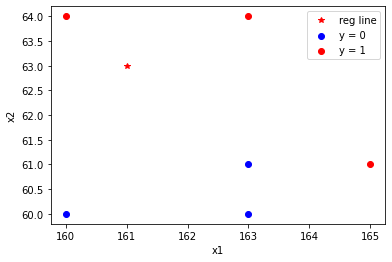

In [ ]:
clf_data = np.array([[160, 60, 0], [163, 60, 0], [163, 61, 0], [160, 64, 1], [163, 64, 1], [165, 61, 1]])
# Question:
# Given the data we have, does a 33 year old like pineapples on their pizza?
clf_query = np.array([161, 63])
clf_k_nearest_neighbors, clf_prediction = knn(
    clf_data, clf_query, k=3, distance_fn=euclidean_distance, choice_fn=mode)
print(clf_prediction)
plot_class(clf_data[:, :-1], clf_data[:, -1], clf_query, clf_prediction)

## Dataset movies recomendation

### Connect Drive

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
!pwd

Mounted at /content/gdrive
/content


In [ ]:
#put your own path in google drive
%cd "/content/gdrive/MyDrive/Colab Notebooks/AI/MachineLearning/Files"
!ls

/content/gdrive/MyDrive/Colab Notebooks/AI/MachineLearning/Files
cars.csv	 employees.csv	     marathon-data.csv		     wine.data
data.npz	 example.txt	     mkb_data.npz		     wine.names
dataset1.csv	 iris.data	     model.png
dataset1.gsheet  iris.names	     movies_recommendation_data.csv
diabetes.csv	 Mall_Customers.csv  twitterLogo.png


In [ ]:
def recommend_movies(movie_query, k_recommendations):
    raw_movies_data = []
    with open('movies_recommendation_data.csv', 'r') as md:
        # Discard the first line (headings)
    	next(md)

    	# Read the data into memory
    	for line in md.readlines():
        	data_row = line.strip().split(',')
        	raw_movies_data.append(data_row)

	# Prepare the data for use in the knn algorithm by picking
	# the relevant columns and converting the numeric columns
	# to numbers since they were read in as strings
    movies_recommendation_data = []
    for row in raw_movies_data:
        data_row = list(map(float, row[2:]))
        movies_recommendation_data.append(data_row)
    # Use the KNN algorithm to get the 5 movies that are most
	# similar to The Post.
    movies_recommendation_data = np.array(movies_recommendation_data)
    movie_query = np.array(movie_query)
    recommendation_indices, _ = knn(
    	movies_recommendation_data, movie_query, k=k_recommendations,
    	distance_fn=euclidean_distance, choice_fn=lambda x: None)

    movie_recommendations = []
    for _, index in recommendation_indices:
        index = int(index)
        movie_recommendations.append(raw_movies_data[index])

    return movie_recommendations

In [ ]:
the_post = [7.2, 1, 1, 0, 0, 0, 0, 1] # feature vector for The Post
label = 0
recommended_movies = recommend_movies(movie_query=the_post, k_recommendations=5)

# Print recommended movie titles
for recommendation in recommended_movies:
    print(recommendation[1])

12 Years a Slave
Hacksaw Ridge
Queen of Katwe
The Wind Rises
A Beautiful Mind
